# Networks
- Notes on networks and Python's networkx module

In [7]:
%matplotlib inline
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

import networkx as nx

np.random.seed(0)

### Background
- Framework to study complexity in data
- Model relationships between entities
- Useful for social 
- Gain insight into entities/nodes that are important
- Find communities in network
- Nodes, edges, make up graph
- 2 people, their id, age, and the edge has data about when they became friends

### Types
- Undirected graphs (ie. Facebook) where they are built of edges without any directionality
- Directed graphs (ie. Twitter) where one person may follow another - called a Digraph. Can also be used 
- Also multidigraphs: such as trips between locations, multiple directed edges can occur
- As multigraphs can be memory intense, can collapse them down into single edge containing weights
- Self-loops: nodes that connect to themselves. e.g. trip begins and ends at same location

In [12]:
# can add edges and networkx will auto add nodes

G=nx.Graph()
G.add_node("a")
G.add_nodes_from(["b","c"])

G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)

In [15]:
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

# adding a list of edges:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


In [31]:
# add metadata to node 1
G.node[1]['label'] = 'blue'
print(G.nodes(data=True))
# remove nodes
# G.remove_node(1)

[('a', {}), ('b', {}), ('c', {}), (1, {'label': 'blue'}), (2, {}), ('d', {}), ('e', {})]


In [43]:
nx.degree(G)

DegreeView({'a': 4, 'b': 1, 'c': 2, 1: 3, 2: 2, 'd': 3, 'e': 1})

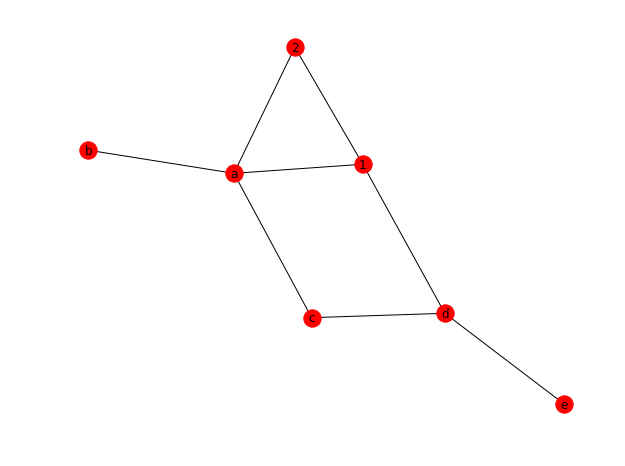

In [30]:
nx.draw(G, with_labels=True)
plt.show()

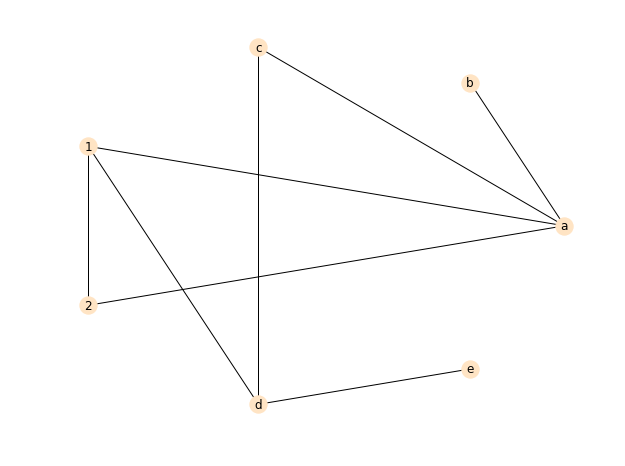

In [32]:
nx.draw_circular(G, with_labels=True, node_color='bisque')
plt.show()

### Graph Properties
- Degree: node's connectiveness
- Density: Number of edges present / total possible edges
- Clustering coefficient: Actual number of friendships / total possibility friendships
    - Number of links that neighbours have with each other, dividied by number of possible links of all neighbours
    - Tells you how closely knit the friends of a network are
    - Can calculate for every node, and also find average
    - nx.clustering(G) is used for clustering of entire network, gives dictionary with values for every node
    - for i in nx.clustering(G).items(): print(i)
    - nx.average_clustering(G)
- Diameter
    - Max shortest path to go from one node to another
    - Shortest path between two furthest nodes in a network
- Successor Node: Node that could serve as a backup and potentially replace an influential node in a network. Preserves the flow of influence throughout the network when important node is removed
- Neighbours: adjacent nodes in a network
- With a directed graph you can also get information on the number of incoming directions to a graph and the number outgoing
- Community detection: Can colour plots based on properties and look for clusters. For instance can see friendships by race at a school.

In [39]:
sum_stats = nx.info(G)
print(sum_stats)
# num connections
print(nx.degree(G))
print(nx.density(G))
print(nx.number_connected_components(G))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 8
Average degree:   2.2857
[('a', 4), ('b', 1), ('c', 2), (1, 3), (2, 2), ('d', 3), ('e', 1)]
0.38095238095238093
1


In [45]:
print(G.number_of_edges())
print(G.degree(1))
print(nx.degree_centrality(G))
print(nx.betweenness_centrality(G))
print(nx.average_clustering(G))
print(nx.diameter(G))
print(nx.shortest_path(G, 1, 2) )

8
3
{'a': 0.6666666666666666, 'b': 0.16666666666666666, 'c': 0.3333333333333333, 1: 0.5, 2: 0.3333333333333333, 'd': 0.5, 'e': 0.16666666666666666}
{'a': 0.43333333333333335, 'b': 0.0, 'c': 0.13333333333333333, 1: 0.26666666666666666, 2: 0.0, 'd': 0.36666666666666664, 'e': 0.0}
0.21428571428571427
4
[1, 2]


### Data
- Don't have to add manually
- Can create from files, pandas, etc
- e.g. table with rows: 1, 463, 1.00 = node 1 has edge to node 463 with weight 1.0
- D = nx.read_weighted_edgelist('add.txt', create_using=nx.DiGraph())

### Case Study: Company wanted to know how experts were collaborating & distributed
- 300 person company
- Surveyed employees to find collaborations and experts
- You don't ask this directly, need to be careful with survey
- Have 2 graphs: graph of collaboration relationships (C), and the graph of expertise nominations (E)
- 3 simple indicators:
    - Collaboration edge density (nx.density(C))
    - Expertise score for nodes using Pagerank (nx.pagerank(E))
    - Average distance from expertise (nx.shortest_paths(E))
- Results:
    - Large clusters of collaborating employees without direct access to expertise on the periphery
    - Large nodes are experts, edges connect people with a collaboration relationship, pink and red are managers, black are employees
    
### Case Study: Twitter and elections
- See how followers of different parties talk with each other during elections
- Used millions of Tweets during Denmark's 2015 election
- Sentiment analysis via AFINN
- Visualised who tweets at whom
- Track average sentiment over time
- How does the network change? Can use nx.triad_census(G)

### Case Study: Corruption in Public Contracting
- Corruption risk index (CRI) grades contracts on the presence of red flags:
    - Short bidding time
    - Presence of dummy bids (fake competitors)
    - Over-determination of requirements (make friend uniquely eligible)
- How is CRI distributed?
- Can represent each market as a bipartite network of winners and issuers, connected by an edge if there is a contracting relationship
- nx.bipartite gives this functionality
- Visualise where the deeper the red, the more suspicious